In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1],random_state=1)

In [ ]:
make_classification?

In [3]:
X.shape

(2000, 20)

In [4]:
pd.Series(y).value_counts()

1    1003
0     997
dtype: int64

In [ ]:
y #1000 zeroes and 1000 ones

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = reg.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, y_pred[:,1]))) 
#There are two columns, I'll be taking the first

Logistic train roc-auc: 0.9863568922694498


In [9]:
y_test_pred = reg.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:, 1])))

Logistic test roc-auc: 0.9885777777777777


In [10]:
y_pred  #First column=probability that y is 0, second column=probability that y is 1

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [11]:
y_test_pred

array([[8.13855047e-03, 9.91861450e-01],
       [9.99991829e-01, 8.17123482e-06],
       [3.30708908e-02, 9.66929109e-01],
       ...,
       [1.56145062e-02, 9.84385494e-01],
       [9.98853167e-01, 1.14683329e-03],
       [1.04598980e-02, 9.89540102e-01]])

#### Roc curve

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:,1])

In [13]:
thresholds

array([1.99970150e+00, 9.99701500e-01, 9.96158877e-01, 9.96129645e-01,
       9.47070326e-01, 9.46204924e-01, 8.65466258e-01, 8.63536252e-01,
       8.53176377e-01, 8.50056757e-01, 8.41421435e-01, 8.39367909e-01,
       8.15506733e-01, 8.14031083e-01, 7.10421057e-01, 6.95370907e-01,
       6.71015565e-01, 6.37604614e-01, 6.28000190e-01, 6.25419393e-01,
       5.85991638e-01, 5.72811301e-01, 5.44222421e-01, 5.09091565e-01,
       5.05747727e-01, 4.25206094e-01, 4.00497635e-01, 3.57672321e-01,
       3.57418343e-01, 3.08833885e-01, 3.04354181e-01, 2.98609914e-01,
       2.96733938e-01, 2.62534344e-01, 2.58894947e-01, 2.46055520e-01,
       2.13787155e-01, 8.32534990e-02, 8.12384385e-02, 5.22202002e-06,
       4.99437632e-06, 2.17237065e-07])

In [ ]:
#Which threshold value needs to be selected?

In [14]:
from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    y_pred = np.where(y_test_pred[:,1]>thres,1,0) #if pred is greater than threshold, convert as 1 or 0
    accuracy.append(accuracy_score(y_test, y_pred, normalize=True)) #apppend this accuracy score inside the list
accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],
                    axis=1)

In [15]:
accuracy.columns = ['thresholds','accuracy']
accuracy.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy.head()

,thresholds,accuracy
23,0.509092,0.966667
21,0.572811,0.965000
24,0.505748,0.965000
22,0.544222,0.965000
20,0.585992,0.963333


So, we definitely go with the first threshold value

Combined threshold values of all the four models, for which we got the highest accuracy

In [16]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

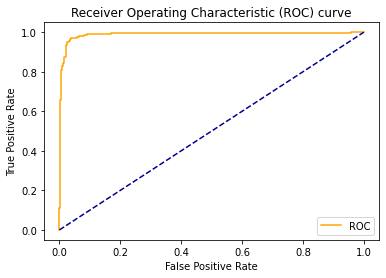

In [17]:
plot_roc_curve(fpr, tpr)

Using precision

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
precision = []
for thres in thresholds:
    y_pred = np.where(y_test_pred[:,1]>thres,1,0) #if pred is greater than threshold, convert as 1 or 0
    precision.append(precision_score(y_test, y_pred)) #apppend this accuracy score inside the list
precision = pd.concat([pd.Series(thresholds), pd.Series(precision)],
                    axis=1)

In [19]:
precision.columns = ['thresholds','precision']
precision.sort_values(by='precision', ascending=False, inplace=True)
precision.head()

,thresholds,precision
2,0.996159,1.000000
3,0.996130,1.000000
5,0.946205,0.994949
4,0.947070,0.994924
7,0.863536,0.991837


Using recall

In [20]:
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
recall = []
for thres in thresholds:
    y_pred = np.where(y_test_pred[:,1]>thres,1,0) #if pred is greater than threshold, convert as 1 or 0
    recall.append(precision_score(y_test, y_pred)) #apppend this accuracy score inside the list
recall = pd.concat([pd.Series(thresholds), pd.Series(recall)],
                    axis=1)

In [21]:
recall.columns = ['thresholds','recall']
recall.sort_values(by='recall', ascending=False, inplace=True)
recall.head()  #The higher threshold essentially does a better job classifying

,thresholds,recall
2,0.996159,1.000000
3,0.996130,1.000000
5,0.946205,0.994949
4,0.947070,0.994924
7,0.863536,0.991837
